### Chap 3: Scikit-learn Machine Learning

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset.
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
# Split dataset into train set & test set.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/levinha1/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


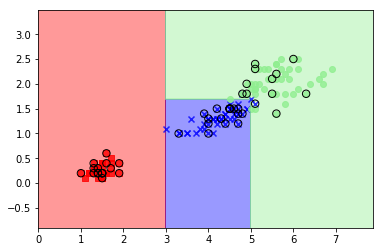

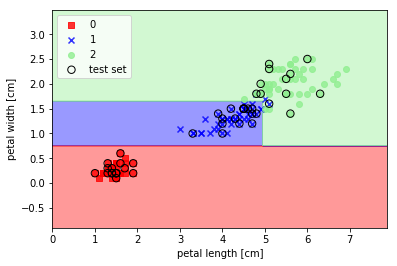

In [4]:
# Train the model.
from sklearn.tree import DecisionTreeClassifier
from visual import *
from main import *
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree2.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.show()
plot_decision_regions(X_combined, y_combined, classifier=tree2, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Chapter 4: Data Preprocessing

##### 1. Deal with missing data.

##### 2. Handle categorical data.

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']

In [7]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [8]:
# Map ordinal features.
size_mapping = {'M': 1, 'L': 2, 'XL': 3}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [9]:
# Encode class labels.
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['classlabel'] = class_le.fit_transform(df['classlabel'].values)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [10]:
# Perform one hot encoding on nominal features.
df = pd.concat([pd.get_dummies(df['color']), df[['size', 'price', 'classlabel']]], axis = 1)

In [11]:
df

,blue,green,red,size,price,classlabel
0,0,1,0,1,10.1,0
1,0,0,1,2,13.5,1
2,1,0,0,3,15.3,0


##### 3. Partition dataset in traning set and test set.

In [12]:
# Partition a dataset in training and test sets.
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines',
'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# Split into train set & test set.
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### 4. Perfom feature scaling.

In [15]:
# Normalization.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# Standardization.
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [17]:
X_train_std.shape

(124, 13)

##### 5. Feature Selection.

In [1]:
# Sparse solution with L1 regularization.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

ModuleNotFoundError: No module named 'sklearn'